In [238]:
# %matplotlib widget
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np


WL = 6362
I = 414
FILE_PATH = os.path.join(".", "15_atom", f"{WL}_{I}.dat")
F = 274.93

df = pd.read_csv(FILE_PATH, sep=" ", header=0, names=["n", "k", "amp"])
df

,n,k,amp
0,2,211.305,-83
1,3,211.308,-65
2,4,211.312,-23
3,5,211.315,-92
4,6,211.319,3
...,...,...,...
3642,3644,225.508,-279
3643,3645,225.512,-301
3644,3646,225.517,-362
3645,3647,225.521,-480


In [239]:
df["k"] = df["n"]*0.008
df

,n,k,amp
0,2,0.016,-83
1,3,0.024,-65
2,4,0.032,-23
3,5,0.040,-92
4,6,0.048,3
...,...,...,...
3642,3644,29.152,-279
3643,3645,29.160,-301
3644,3646,29.168,-362
3645,3647,29.176,-480


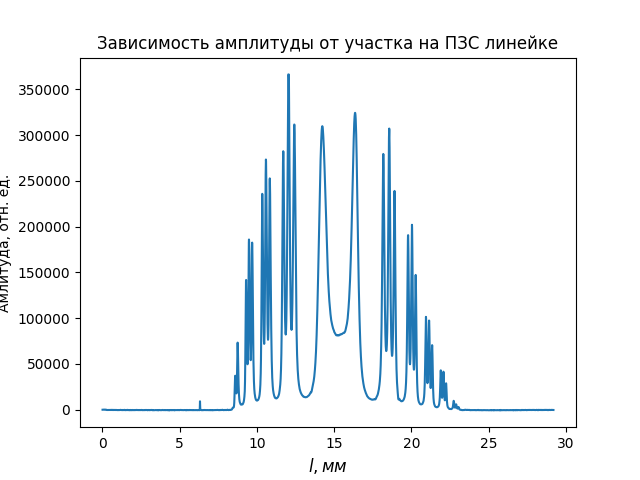

In [240]:
%matplotlib widget
plt.plot(df["k"], df["amp"])
plt.xlabel(r'$l, мм$', fontsize="large")
plt.ylabel(r'Амлитуда, отн. ед.')
plt.title(r'Зависимость амплитуды от участка на ПЗС линейке')
plt.show()

In [241]:
df = df[(df["k"] > 17.5) & (df["k"] < 19.2)]
df["k"] = df["k"] - 15.31
df

C:\Users\mrsca\AppData\Local\Temp\ipykernel_11260\1801708268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["k"] = df["k"] - 15.31


,n,k,amp
2186,2188,2.194,11036
2187,2189,2.202,10899
2188,2190,2.210,10904
2189,2191,2.218,11029
2190,2192,2.226,11027
...,...,...,...
2393,2395,3.850,11105
2394,2396,3.858,11042
2395,2397,3.866,11154
2396,2398,3.874,11449


In [242]:
k0 = (WL * 10**(-8))**(-1)
cold = k0 / (1 + 3.25**2 / F**2)**0.5
df["k"] = cold * (1+df["k"]**2 / F**2)**0.5 - k0

C:\Users\mrsca\AppData\Local\Temp\ipykernel_11260\3820560080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["k"] = cold * (1+df["k"]**2 / F**2)**0.5 - k0


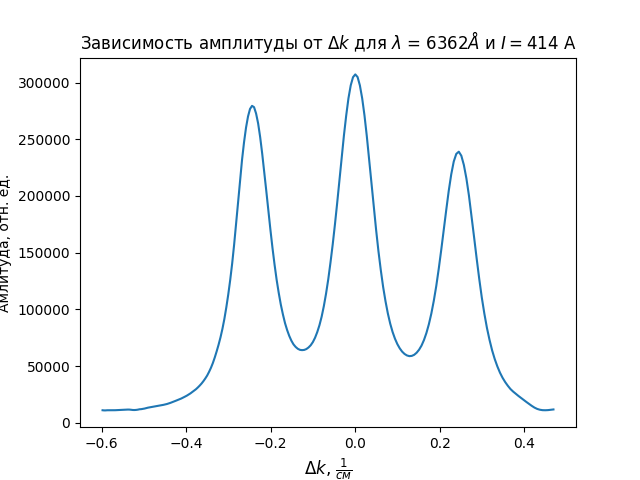

In [243]:
%matplotlib widget
plt.plot(df["k"], df["amp"])
plt.xlabel(r'$\Delta k$, $\frac{1}{см}$' , fontsize="large")
plt.ylabel(r'Амлитуда, отн. ед.')
plt.title(r'Зависимость амплитуды от $\Delta k$ для $\lambda$ = ' + str(WL) + r'$\AA $ и $I =$' + str(I) + ' А')
plt.show()

[-2.41325414e-01 -3.00986488e-04  2.42916185e-01  2.58248732e+05
  2.87058125e+05  2.21049130e+05  5.27048449e-03  5.81379828e-03
  5.64654357e-03] [9.63693666e-04 9.50962487e-04 1.28055128e-03 4.18024026e+03
 4.36393455e+03 4.60036965e+03 2.00900066e-04 2.12743115e-04
 2.77343749e-04]


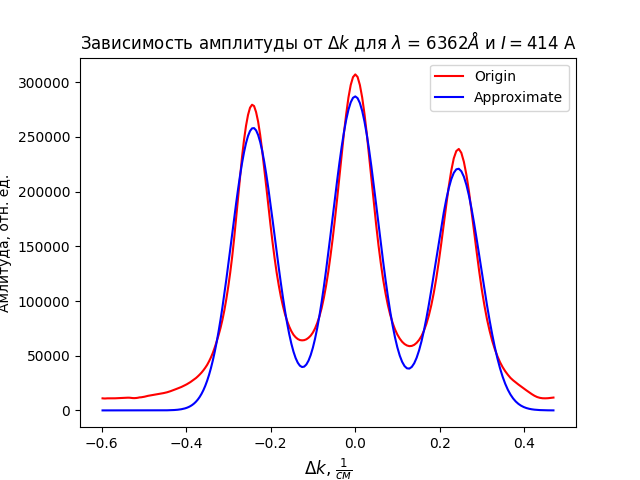

In [244]:
%matplotlib widget
def func3(x, xc1, xc2, xc3, a1, a2, a3, b1, b2, b3):
    return a1 * np.exp(-(x - xc1)**2 / b1) + a2 * np.exp(-(x - xc2)**2 / b2) + a3 * np.exp(-(x - xc3)**2 / b3)

# def func6(x, xc1, xc2, xc3, xc4, xc5, xc6, a1, a2, a3, a4, a5, a6, b1, b2, b3, b4, b5, b6):
#     return func3(x, xc1, xc2, xc3, a1, a2, a3, b1, b2, b3) + func3(x, xc4, xc5, xc6, a4, a5, a6, b1, b2, b3)

popt, perr = curve_fit(func3, df["k"], df["amp"], p0=[-0.221, -0.003, 0.229, 150000, 250000, 150000, 0.001, 0.002, 0.0015])
print(popt, np.sqrt(np.diag(perr)))

plt.plot(df["k"], df["amp"], c="red", label="Origin")
plt.plot(df["k"], func3(df["k"], *popt), c="blue", label="Approximate")
plt.xlabel(r'$\Delta k$, $\frac{1}{см}$' , fontsize="large")
plt.ylabel(r'Амлитуда, отн. ед.')
plt.title(r'Зависимость амплитуды от $\Delta k$ для $\lambda$ = ' + str(WL) + r'$\AA $ и $I =$' + str(I) + ' А')

plt.legend()
plt.savefig(os.path.join(".", "ims", f"appr_{WL}_{I}_"))
plt.show()

In [258]:
(0.225 + 0.216) / 2

0.2205

In [ ]:
189 + 199)

In [ ]:
0.0755 +- 0.001
0.2375 +- 0.005

0.0675 0.114 0.118 0.112 0.069

0.194 +- 0.003
0.2205 +- 0.003
0.223 +- 0.005
0.242 +- 0.005